In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
sidewalk = gpd.read_file('SeattleData/ProjectSidewalkLabelsMappedonSidewalk/ProjectSidewalkLabelsMappedonSidewalk.shp')
sidewalk.head()

OBJECTID  COMPKEY  COMPTYPE  SEGKEY     UNITID UNITTYPE  \
0         2   328243        97    9308  SDW-30391      SDW   
1         3   328244        97    9308  SDW-43317      SDW   
2         4   328245        97    9307  SDW-30392      SDW   
3         5   328246        97    9307  SDW-30393      SDW   
4         6   328249        97   13246  SDW-30395      SDW   

                                            UNITDESC         ADDBY  \
0  BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...  SW DATA LOAD   
1  BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...  SW DATA LOAD   
2  BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...  SW DATA LOAD   
3  BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...  SW DATA LOAD   
4  UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...  SW DATA LOAD   

      ADDDTTM ASBLT  CONDITION  CONDITION_ CURBTYPE CURRENT_ST  CURRENT__1  \
0  2007-09-26  None       FAIR  2017-06-30     410A      INSVC  2010-07-31   
1  2007-09-26  None       GOOD  2017-06-30     410A      INSVC  2010-07-31   
2  2007-09-26  None       GOOD  2017-06-30     410C      INSVC  2010-07-31   
3  2007-09-26  None  EXCELLENT  2017-06-30     410C      INSVC  2010-07-31   
4  2007-09-26  None       None        None     NONE      INSVC        None   

  FILLERTYPE  FILLERWID INSTALL_DA  SW_WIDTH MAINTAINED  MATL  \
0         AC         18       None        96       None  None   
1       LSCP         30       None        72       None  None   
2       LSCP         18       None        96       None  None   
3       LSCP         18       None        72       None  None   
4       NONE          0       None         0       None  None   

                MODBY     MODDTTM OWNERSHIP SIDE SURFTYPE BUILDERCD  \
0  SIDEWALK COLLECTOR  2018-02-07      None   SW      PCC      None   
1  SIDEWALK COLLECTOR  2018-02-07      None   NE      PCC      None   
2  SIDEWALK COLLECTOR  2018-02-07      None   SW      PCC      None   
3           SR1146066  2021-08-27      PARK   NE      PCC      None   
4                NGOC  2017-07-26      None    E   UIMPRV      None   

  MAINTBYRDW SWINCOMPLE MULTIPLESU GSITYPECD  DATE_MVW_L PRIMARYDIS  \
0          N          N          N      None  2022-06-17  DISTRICT3   
1          N          N          N      None  2022-06-17  DISTRICT3   
2          N          N          N      None  2022-06-17  DISTRICT3   
3          N          N          N      None  2022-06-17  DISTRICT3   
4          N          N          N      None  2022-06-17  DISTRICT2   

  SECONDARYD OVERRIDEYN OVERRIDECO  SRTS_SIDEW  PRIMARYCRO  MINIMUMVAR  \
0       None          N       None         3.0         0.4           0   
1       None          N       None         3.0         2.4           0   
2       None          N       None         3.0         2.1           0   
3       None          N       None         3.0         1.5           0   
4       None          N       None         2.0         0.0           0   

   LAST_VERIF COLOR  OWNERSHIP_ NATURE_OF_ MAINT_FINA SW_CATEGOR VARIABLEWI  \
0  2017-06-30  None        None       None       None      BLOCK          N   
1  2017-06-30  None        None       None       None      BLOCK          N   
2  2017-06-30  None        None       None       None      BLOCK          N   
3  2017-06-30  None  2021-08-27       None       None      BLOCK          N   
4        None  None        None       None       None       None          N   

       MAINTENANC  SHAPE_Leng  \
0  SSRP_C4_SWShim  259.229841   
1  SSRP_C4_SWShim  259.229392   
2  SSRP_C4_SWShim  178.386732   
3  SSRP_C4_SWShim  121.582237   
4            None  518.804925   

                                            geometry  
0  LINESTRING (-122.32138 47.60504, -122.32193 47...  
1  LINESTRING (-122.32115 47.60513, -122.32170 47...  
2  LINESTRING (-122.32087 47.60450, -122.32125 47...  
3  LINESTRING (-122.32084 47.60480, -122.32110 47...  
4  LINESTRING (-122.33521 47.55570, -122.33521 47...

In [3]:
labels = gpd.read_file('SeattleData/ProjectSidewalkData/ProjectSidewalkData_Geolabels.shp')
labels.head()

Attribute Label Type  Street ID  OSM Street   Neighborho   latitude  \
0   57259626   CurbRamp      22481   394459713  Portage Bay  47.643120   
1   57259627   CurbRamp      12051    13521798  Portage Bay  47.643257   
2   57259629   CurbRamp      12051    13521798  Portage Bay  47.643116   
3   57259630   CurbRamp      22481   394459713  Portage Bay  47.643154   
4   57259632   CurbRamp       6732     6456858  Portage Bay  47.651380   

   longtitude  Severity  Temporary  Agree Coun  Disagree C  Not Sure C  \
0  -122.32030       3.0          0           0           0           1   
1  -122.32189       1.0          0           2           0           0   
2  -122.32210       1.0          0           2           1           0   
3  -122.32017       1.0          0           1           0           0   
4  -122.32120       1.0          0           2           0           0   

                      geometry  
0  POINT (-122.32030 47.64312)  
1  POINT (-122.32189 47.64326)  
2  POINT (-122.32210 47.64312)  
3  POINT (-122.32017 47.64315)  
4  POINT (-122.32120 47.65138)

In [4]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk)
labels_mapped_on_sidewalk.head()

Attribute      Label Type  Street ID  OSM Street   Neighborho  \
0       57259626        CurbRamp      22481   394459713  Portage Bay   
1       57259627        CurbRamp      12051    13521798  Portage Bay   
35      57259744      NoSidewalk      12051    13521798  Portage Bay   
46714   57259940  SurfaceProblem      12051    13521798  Portage Bay   
70319   57259979  SurfaceProblem      12051    13521798  Portage Bay   

        latitude  longtitude  Severity  Temporary  Agree Coun  Disagree C  \
0      47.643120 -122.320300       3.0          0           0           0   
1      47.643257 -122.321890       1.0          0           2           0   
35     47.643270 -122.321465       3.0          0           0           0   
46714  47.643272 -122.321280       3.0          0           1           1   
70319  47.643272 -122.321540       3.0          0           0           1   

       Not Sure C                     geometry  index_right  OBJECTID  \
0               1  POINT (-122.32030 47.64312)        19267     27065   
1               0  POINT (-122.32189 47.64326)        19270     27068   
35              0  POINT (-122.32146 47.64327)        19270     27068   
46714           0  POINT (-122.32128 47.64327)        19270     27068   
70319           1  POINT (-122.32154 47.64327)        19270     27068   

       COMPKEY  COMPTYPE  SEGKEY     UNITID UNITTYPE  \
0       311888        97   14727  SDW-15994      SDW   
1       311891        97   14726  SDW-15997      SDW   
35      311891        97   14726  SDW-15997      SDW   
46714   311891        97   14726  SDW-15997      SDW   
70319   311891        97   14726  SDW-15997      SDW   

                                                UNITDESC         ADDBY  \
0      E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...  SW DATA LOAD   
1      E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
35     E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
46714  E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
70319  E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   

          ADDDTTM ASBLT CONDITION  CONDITION_ CURBTYPE CURRENT_ST  CURRENT__1  \
0      2007-09-26  None      GOOD  2017-07-12     410C      INSVC  2007-09-26   
1      2007-09-26  None      FAIR  2017-07-12     410C      INSVC  2007-09-26   
35     2007-09-26  None      FAIR  2017-07-12     410C      INSVC  2007-09-26   
46714  2007-09-26  None      FAIR  2017-07-12     410C      INSVC  2007-09-26   
70319  2007-09-26  None      FAIR  2017-07-12     410C      INSVC  2007-09-26   

      FILLERTYPE  FILLERWID INSTALL_DA  SW_WIDTH MAINTAINED  MATL  \
0           LSCP         53       None        72       None  None   
1           LSCP         52       None        72       None  None   
35          LSCP         52       None        72       None  None   
46714       LSCP         52       None        72       None  None   
70319       LSCP         52       None        72       None  None   

                    MODBY     MODDTTM OWNERSHIP SIDE SURFTYPE BUILDERCD  \
0               SR1146066  2021-08-27      PARK    S      PCC      None   
1      SIDEWALK COLLECTOR  2018-02-07      None    N      PCC      None   
35     SIDEWALK COLLECTOR  2018-02-07      None    N      PCC      None   
46714  SIDEWALK COLLECTOR  2018-02-07      None    N      PCC      None   
70319  SIDEWALK COLLECTOR  2018-02-07      None    N      PCC      None   

      MAINTBYRDW SWINCOMPLE MULTIPLESU GSITYPECD  DATE_MVW_L PRIMARYDIS  \
0              N          N          N      None  2022-06-17  DISTRICT3   
1              N          N          N      None  2022-06-17  DISTRICT3   
35             N          N          N      None  2022-06-17  DISTRICT3   
46714          N          N          N      None  2022-06-17  DISTRICT3   
70319          N          N          N      None  2022-06-17  DISTRICT3   

      SECONDARYD OVERRIDEYN OVERRIDECO  SRTS_SIDEW  PRIMARYCRO  MINIMUMVAR  \
0       

In [5]:
#Select label types : 'CurbRamp'
CurbRamp = labels_mapped_on_sidewalk.loc[labels_mapped_on_sidewalk['Label Type'] == 'CurbRamp']
CurbRamp.head()

Attribute Label Type  Street ID  OSM Street   Neighborho   latitude  \
0   57259626   CurbRamp      22481   394459713  Portage Bay  47.643120   
1   57259627   CurbRamp      12051    13521798  Portage Bay  47.643257   
2   57259629   CurbRamp      12051    13521798  Portage Bay  47.643116   
3   57259630   CurbRamp      22481   394459713  Portage Bay  47.643154   
4   57259632   CurbRamp       6732     6456858  Portage Bay  47.651380   

   longtitude  Severity  Temporary  Agree Coun  Disagree C  Not Sure C  \
0  -122.32030       3.0          0           0           0           1   
1  -122.32189       1.0          0           2           0           0   
2  -122.32210       1.0          0           2           1           0   
3  -122.32017       1.0          0           1           0           0   
4  -122.32120       1.0          0           2           0           0   

                      geometry  index_right  OBJECTID  COMPKEY  COMPTYPE  \
0  POINT (-122.32030 47.64312)        19267     27065   311888        97   
1  POINT (-122.32189 47.64326)        19270     27068   311891        97   
2  POINT (-122.32210 47.64312)        19271     27069   311892        97   
3  POINT (-122.32017 47.64315)        18986     26741   311592        97   
4  POINT (-122.32120 47.65138)        11383     17710   302429        97   

   SEGKEY     UNITID UNITTYPE  \
0   14727  SDW-15994      SDW   
1   14726  SDW-15997      SDW   
2   14725  SDW-15998      SDW   
3    1301  SDW-17956      SDW   
4   10578  SDW-13290      SDW   

                                            UNITDESC         ADDBY  \
0  E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...  SW DATA LOAD   
1  E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
2  E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...  SW DATA LOAD   
3  10TH AVE E BETWEEN E MILLER ST AND E ROANOKE W...  SW DATA LOAD   
4  FUHRMAN AVE E BETWEEN FRANKLIN AVE E AND EASTL...  SW DATA LOAD   

      ADDDTTM    ASBLT  CONDITION  CONDITION_ CURBTYPE CURRENT_ST  CURRENT__1  \
0  2007-09-26     None       GOOD  2017-07-12     410C      INSVC  2007-09-26   
1  2007-09-26     None       FAIR  2017-07-12     410C      INSVC  2007-09-26   
2  2007-09-26     None  EXCELLENT  2017-07-18     NONE      INSVC  2010-07-31   
3  2007-09-26  774-689       GOOD  2017-07-11     410A      INSVC  2010-08-24   
4  2007-09-26     None       GOOD  2017-07-12     410C      INSVC  2010-07-31   

  FILLERTYPE  FILLERWID INSTALL_DA  SW_WIDTH MAINTAINED  MATL  \
0       LSCP         53       None        72       None  None   
1       LSCP         52       None        72       None  None   
2       NONE          0       None        94       None  None   
3        PCC         30       None        72       None  None   
4        PCC        138       None        72       None  None   

                MODBY     MODDTTM OWNERSHIP SIDE SURFTYPE BUILDERCD  \
0           SR1146066  2021-08-27      PARK    S      PCC      None   
1  SIDEWALK COLLECTOR  2018-02-07      None    N      PCC      None   
2  SIDEWALK COLLECTOR  2018-02-07      None    S      PCC      None   
3           SR1146066  2021-08-27      PARK    W      PCC      None   
4  SIDEWALK COLLECTOR  2018-02-07      None   SW      PCC      None   

  MAINTBYRDW SWINCOMPLE MULTIPLESU GSITYPECD  DATE_MVW_L PRIMARYDIS  \
0          N          N          N      None  2022-06-17  DISTRICT3   
1          N          N          N      None  2022-06-17  DISTRICT3   
2          N          N          N      None  2022-06-17  DISTRICT3   
3          N          N          N      None  2022-06-17  DISTRICT3   
4          N          N          N      None  2022-06-17  DISTRICT3   

  SECONDARYD OVERRIDEYN OVERRIDECO  SRTS_SIDEW  PRIMARYCRO  MINIMUMVAR  \
0       None          N       None         3.0         2.7           0   
1       None          N       None         3.0         1.7           0   
2  DISTRICT4          N       None         3.0         2.0           0   
3       

In [6]:
#Cleaning data
CurbRamp =CurbRamp.loc[CurbRamp['Disagree C'] == 0] #Takeout ones with disagreecounts
CurbRamp = CurbRamp.dropna(subset=['Severity']) #Takeout Severity NA datas

In [7]:
#Weighted count based on severity
dict1 ={ 1.0:1.0, 2.0:0.8, 3.0: 0.6, 4.0:0.4, 5.0:0.2}
CurbRamp = CurbRamp.replace({"Severity": dict1})
CurbRamp = CurbRamp.rename(columns={'Severity': 'WeightedCount'})

In [8]:
#Group label data by street ID
CurbRamp_grouped = CurbRamp.groupby(by=["OBJECTID"]).sum()
CurbRamp_grouped.head()

Attribute  Street ID  OSM Street    latitude  longtitude  \
OBJECTID                                                             
2         173584022      63761  1160465626  142.816433 -366.965285   
3          57861367      21920   369877037   47.605186 -122.321220   
4         115722870      47821   884781396   95.209087 -244.641810   
5          57861365      26367   537686684   47.604850 -122.320910   
32         58912196      23248   428017301   47.549020 -122.334465   

          WeightedCount  Temporary  Agree Coun  Disagree C  Not Sure C  \
OBJECTID                                                                 
2                   2.8          0           4           0           0   
3                   0.8          0           1           0           0   
4                   2.0          0           6           0           0   
5                   0.8          0           2           0           0   
32                  1.0          0           0           0           0   

          index_right  COMPKEY  COMPTYPE  SEGKEY  FILLERWID  SW_WIDTH  \
OBJECTID                                                                
2                   0   984729       291   27924         54       288   
3                   1   328244        97    9308         30        72   
4                   4   656490       194   18614         36       192   
5                   3   328246        97    9307         18        72   
32                  8   328254        97   14403          0        72   

          SRTS_SIDEW  PRIMARYCRO  MINIMUMVAR  SHAPE_Leng  
OBJECTID                                                  
2                9.0         1.2           0  777.689523  
3                3.0         2.4           0  259.229392  
4                6.0         4.2           0  356.773464  
5                3.0         1.5           0  121.582237  
32               3.0         2.2          19  442.863524

In [9]:
#Merge back to sidewalk geometry
sidewalk_w_labels = sidewalk.merge(CurbRamp_grouped, how='outer', on='OBJECTID').fillna(0)
sidewalk_w_labels.head()

OBJECTID  COMPKEY_x  COMPTYPE_x  SEGKEY_x     UNITID UNITTYPE  \
0         2     328243          97      9308  SDW-30391      SDW   
1         3     328244          97      9308  SDW-43317      SDW   
2         4     328245          97      9307  SDW-30392      SDW   
3         5     328246          97      9307  SDW-30393      SDW   
4         6     328249          97     13246  SDW-30395      SDW   

                                            UNITDESC         ADDBY  \
0  BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...  SW DATA LOAD   
1  BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...  SW DATA LOAD   
2  BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...  SW DATA LOAD   
3  BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...  SW DATA LOAD   
4  UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...  SW DATA LOAD   

      ADDDTTM ASBLT  CONDITION  CONDITION_ CURBTYPE CURRENT_ST  CURRENT__1  \
0  2007-09-26     0       FAIR  2017-06-30     410A      INSVC  2010-07-31   
1  2007-09-26     0       GOOD  2017-06-30     410A      INSVC  2010-07-31   
2  2007-09-26     0       GOOD  2017-06-30     410C      INSVC  2010-07-31   
3  2007-09-26     0  EXCELLENT  2017-06-30     410C      INSVC  2010-07-31   
4  2007-09-26     0          0           0     NONE      INSVC           0   

  FILLERTYPE  FILLERWID_x INSTALL_DA  SW_WIDTH_x MAINTAINED  MATL  \
0         AC           18          0          96          0     0   
1       LSCP           30          0          72          0     0   
2       LSCP           18          0          96          0     0   
3       LSCP           18          0          72          0     0   
4       NONE            0          0           0          0     0   

                MODBY     MODDTTM OWNERSHIP SIDE SURFTYPE BUILDERCD  \
0  SIDEWALK COLLECTOR  2018-02-07         0   SW      PCC         0   
1  SIDEWALK COLLECTOR  2018-02-07         0   NE      PCC         0   
2  SIDEWALK COLLECTOR  2018-02-07         0   SW      PCC         0   
3           SR1146066  2021-08-27      PARK   NE      PCC         0   
4                NGOC  2017-07-26         0    E   UIMPRV         0   

  MAINTBYRDW SWINCOMPLE MULTIPLESU GSITYPECD  DATE_MVW_L PRIMARYDIS  \
0          N          N          N         0  2022-06-17  DISTRICT3   
1          N          N          N         0  2022-06-17  DISTRICT3   
2          N          N          N         0  2022-06-17  DISTRICT3   
3          N          N          N         0  2022-06-17  DISTRICT3   
4          N          N          N         0  2022-06-17  DISTRICT2   

  SECONDARYD OVERRIDEYN  OVERRIDECO  SRTS_SIDEW_x  PRIMARYCRO_x  MINIMUMVAR_x  \
0          0          N           0           3.0           0.4             0   
1          0          N           0           3.0           2.4             0   
2          0          N           0           3.0           2.1             0   
3          0          N           0           3.0           1.5             0   
4          0          N           0           2.0           0.0             0   

   LAST_VERIF COLOR  OWNERSHIP_ NATURE_OF_  MAINT_FINA SW_CATEGOR VARIABLEWI  \
0  2017-06-30     0           0          0           0      BLOCK          N   
1  2017-06-30     0           0          0           0      BLOCK          N   
2  2017-06-30     0           0          0           0      BLOCK          N   
3  2017-06-30     0  2021-08-27          0           0      BLOCK          N   
4           0     0           0          0           0          0          N   

       MAINTENANC  SHAPE_Leng_x  \
0  SSRP_C4_SWShim    259.229841   
1  SSRP_C4_SWShim    259.229392   
2  SSRP_C4_SWShim    178.386732   
3  SSRP_C4_SWShim    121.582237   
4               0    518.804925   

                                            geometry    Attribute  Street ID  \
0  LINESTRING (-122.32138 47.60504, -122.32193 47...  173584022.0    63761.0   
1  LINESTRING (-122.32115 47.60513, -122.32170 47...   57861367.0    21920.0   
2  LINESTRING (-

In [10]:
#Select only useful columns
CurbRamp_per_street = sidewalk_w_labels[['OBJECTID','CONDITION','WeightedCount','SHAPE_Leng_x','geometry']]
CurbRamp_per_street.head()

OBJECTID  CONDITION  WeightedCount  SHAPE_Leng_x  \
0         2       FAIR            2.8    259.229841   
1         3       GOOD            0.8    259.229392   
2         4       GOOD            2.0    178.386732   
3         5  EXCELLENT            0.8    121.582237   
4         6          0            0.0    518.804925   

                                            geometry  
0  LINESTRING (-122.32138 47.60504, -122.32193 47...  
1  LINESTRING (-122.32115 47.60513, -122.32170 47...  
2  LINESTRING (-122.32087 47.60450, -122.32125 47...  
3  LINESTRING (-122.32084 47.60480, -122.32110 47...  
4  LINESTRING (-122.33521 47.55570, -122.33521 47...

In [11]:
#Normalize problems count by street length
CurbRamp_per_street ['CurbRamps_WeightedCount_per_feet'] = (CurbRamp_per_street ['WeightedCount']/CurbRamp_per_street ['SHAPE_Leng_x'])
CurbRamp_per_street.head()

OBJECTID  CONDITION  WeightedCount  SHAPE_Leng_x  \
0         2       FAIR            2.8    259.229841   
1         3       GOOD            0.8    259.229392   
2         4       GOOD            2.0    178.386732   
3         5  EXCELLENT            0.8    121.582237   
4         6          0            0.0    518.804925   

                                            geometry  \
0  LINESTRING (-122.32138 47.60504, -122.32193 47...   
1  LINESTRING (-122.32115 47.60513, -122.32170 47...   
2  LINESTRING (-122.32087 47.60450, -122.32125 47...   
3  LINESTRING (-122.32084 47.60480, -122.32110 47...   
4  LINESTRING (-122.33521 47.55570, -122.33521 47...   

   CurbRamps_WeightedCount_per_feet  
0                          0.010801  
1                          0.003086  
2                          0.011212  
3                          0.006580  
4                          0.000000

<AxesSubplot:xlabel='CurbRamps_WeightedCount_per_feet', ylabel='Count'>

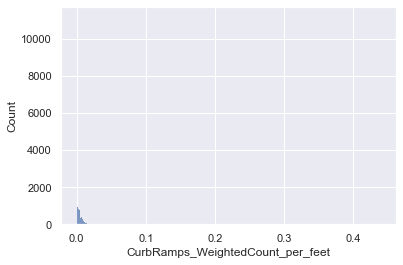

In [12]:
#Check boxplot
sns.histplot(data=CurbRamp_per_street, x="CurbRamps_WeightedCount_per_feet")

In [13]:
#Remove outliers
q = CurbRamp_per_street["CurbRamps_WeightedCount_per_feet"].quantile(0.99)
CurbRamp_per_street_n = CurbRamp_per_street[CurbRamp_per_street["CurbRamps_WeightedCount_per_feet"] < q]

In [14]:
#Group to block data
bg = gpd.read_file('SeattleData/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

OBJECTID TRACTCE10 BLKGRPCE10       GEOID10     NAMELSAD10   INTPTLAT10  \
0         1    000100          1  530330001001  Block Group 1  +47.7276870   
1         2    000100          2  530330001002  Block Group 2  +47.7293165   
2         3    000100          3  530330001003  Block Group 3  +47.7228093   
3         4    000100          4  530330001004  Block Group 4  +47.7319367   
4         5    000100          5  530330001005  Block Group 5  +47.7229283   

     INTPTLON10  TRACT   TRBG TRBG_STR  ACRES_TOTA  ACRES_LAND  ACRES_WATE  \
0  -122.2815160    100  100.1    100.1  588.283002  221.041200  367.285577   
1  -122.2924690    100  100.2    100.2   71.258030   71.263215    0.000000   
2  -122.2894558    100  100.3    100.3   91.604629   91.611355    0.000000   
3  -122.2944531    100  100.4    100.4   31.237245   31.239309    0.000000   
4  -122.2944374    100  100.5    100.5   56.956546   56.960756    0.000000   

   WATER    SHAPE_Leng    SHAPE_Area  \
0    NaN  21168.918543  2.562561e+07   
1    NaN   8692.089186  3.104000e+06   
2    NaN   8560.645769  3.990298e+06   
3    NaN   4693.439609  1.360694e+06   
4    NaN   7450.759251  2.481027e+06   

                                            geometry  
0  POLYGON ((-122.26840 47.72641, -122.26719 47.7...  
1  POLYGON ((-122.28970 47.73193, -122.28965 47.7...  
2  POLYGON ((-122.28633 47.72093, -122.28629 47.7...  
3  POLYGON ((-122.29237 47.73194, -122.29231 47.7...  
4  POLYGON ((-122.29273 47.72019, -122.29273 47.7...

In [15]:
sidewalk_per_bg=CurbRamp_per_street_n.sjoin(bg, op="within")
sidewalk_per_bg_grouped = sidewalk_per_bg.groupby(by=["GEOID10"]).sum()
sidewalk_per_bg_grouped.head()

OBJECTID_left  WeightedCount  SHAPE_Leng_x  \
GEOID10                                                    
530330004012         181583            0.0   3746.260838   
530330004023          13072            0.0    305.668468   
530330004024          89209            9.4   4078.977747   
530330005002           6807            0.8   1272.567412   
530330006001           1435            0.0    721.497231   

              CurbRamps_WeightedCount_per_feet  index_right  OBJECTID_right  \
GEOID10                                                                       
530330004012                          0.000000          112             120   
530330004023                          0.000000           18              19   
530330004024                          0.024243          171             180   
530330005002                          0.001257           42              44   
530330006001                          0.000000           23              24   

              TRACT    TRBG  ACRES_TOTA  ACRES_LAND  ACRES_WATE  WATER  \
GEOID10                                                                  
530330004012   3208  3209.6  804.424076  804.480232         0.0    0.0   
530330004023    402   402.3   79.738847   79.745107         0.0    0.0   
530330004024   3618  3621.6  899.451527  899.515973         0.0    0.0   
530330005002   1000  1000.4  199.900779  199.913690         0.0    0.0   
530330006001    600   600.1  222.589518  222.605871         0.0    0.0   

                SHAPE_Leng    SHAPE_Area  
GEOID10                                   
530330004012  74124.535544  3.504071e+07  
530330004023   7895.828165  3.473424e+06  
530330004024  82928.393755  3.918011e+07  
530330005002  18638.620794  8.707678e+06  
530330006001  14009.640956  9.695999e+06

In [16]:
#Normalize sidewalk problems count in each block group
sidewalk_per_bg_grouped= sidewalk_per_bg_grouped[['WeightedCount','SHAPE_Leng_x']].reset_index().rename(columns={'SHAPE_Leng_x': 'SidewalkLeng'})
sidewalk_per_bg_grouped['CurbRamps_WeightedCount_per_mile'] = (sidewalk_per_bg_grouped['WeightedCount']/sidewalk_per_bg_grouped['SidewalkLeng'])* 5280
sidewalk_per_bg_grouped.head()

GEOID10  WeightedCount  SidewalkLeng  CurbRamps_WeightedCount_per_mile
0  530330004012            0.0   3746.260838                          0.000000
1  530330004023            0.0    305.668468                          0.000000
2  530330004024            9.4   4078.977747                         12.167755
3  530330005002            0.8   1272.567412                          3.319274
4  530330006001            0.0    721.497231                          0.000000

<AxesSubplot:xlabel='CurbRamps_WeightedCount_per_mile', ylabel='Count'>

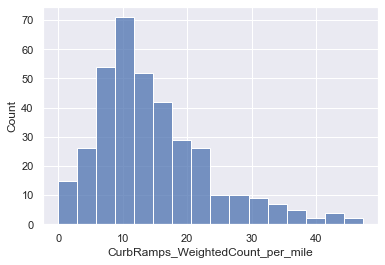

In [17]:
#Check boxplot
sns.histplot(data=sidewalk_per_bg_grouped, x="CurbRamps_WeightedCount_per_mile")

In [18]:
sidewalk_per_bg_grouped.to_csv('SeattleData/SeattleNormalizedSidewalkLabelCounts_CurbRamps_0720.csv',index=False)

In [18]:
bg.explore()

In [19]:
example = bg.loc[bg['GEOID10'] == '530330075003']

In [36]:
m7 = example.explore(tiles="CartoDB positron",tooltip="GEOID10",color="#9DC4CA")

In [21]:
example.explore(tiles="CartoDB positron",tooltip="GEOID10",color="#9DC4CA")

In [29]:
example2 = sidewalk_per_bg.loc[sidewalk_per_bg['GEOID10'] == '530330075003']

In [37]:
m4 = example2.explore(m=m7,tiles="CartoDB positron", tooltip=["OBJECTID_left",'GEOID10'], color="#006B76")

In [38]:
m4

In [28]:
example2

OBJECTID_left  CONDITION  WeightedCount  SHAPE_Leng_x  \
2125            4968       FAIR            0.8    292.776856   
5719           10337       FAIR            0.8     67.912311   
16131          23303       FAIR            1.6    232.170419   
16132          23304       GOOD            1.6    232.170091   
16133          23305       GOOD            2.4    215.247681   
16210          23395       GOOD            0.6    232.225577   
16316          23527  EXCELLENT            1.6    232.979396   
16317          23528       GOOD            1.6    232.979387   
16318          23529       FAIR            0.8    232.208085   
16319          23530       FAIR            1.0    232.208085   
16455          23684       GOOD            0.8    198.620828   
16456          23686       GOOD            0.8    214.811149   
16457          23687       FAIR            0.8    214.051742   
16458          23688       GOOD            0.6    232.192033   
16483          23717       GOOD            0.0    232.191705   
16484          23718       GOOD            0.8    232.257552   
16485          23719       POOR            0.6    232.257880   
16486          23720       FAIR            1.6    211.963066   
16487          23721       GOOD            0.8    224.960967   
16554          23796       GOOD            0.0     75.379783   
16564          23807       FAIR            1.0    193.857267   
16572          23815       FAIR            0.8    130.894631   
16574          23817       POOR            0.0    138.296108   
16577          23820       GOOD            0.0    208.202454   
16740          24011       FAIR            0.8    232.979387   
16742          24013       GOOD            0.0    232.194811   
16744          24015       GOOD            0.8    232.353359   
16766          24038  EXCELLENT            1.6    199.817041   
18995          26752       POOR            0.0    301.400812   
19000          26757       GOOD            0.0    292.776856   
19373          27196       FAIR            0.0    390.892448   
19374          27197       POOR            0.0    390.892448   
19375          27198       FAIR            0.0    301.400822   
19780          27665       FAIR            0.8    215.248009   
19786          27671       GOOD            0.8    391.084778   
19787          27672       GOOD            0.0    391.084778   
19788          27673       FAIR            0.8    391.271686   
19802          27691       GOOD            1.0    232.995573   
19803          27692  VERY-POOR            0.0    232.995573   
19812          27701       GOOD            0.0    386.308143   
19829          27722       FAIR            0.0    390.179619   
19830          27724       FAIR            0.0    386.156500   
19831          27725       GOOD            0.0    284.116123   
19903          27823       GOOD            0.8    393.554774   
19905          27825          0            0.6    393.686606   
19907          27827       GOOD            0.0    288.841925   
19987          27930       GOOD            1.8    389.904652   
19988          27931       FAIR            2.4    389.220352   
19989          27932       GOOD            1.6    306.777403   
20014          27961  VERY-POOR            0.0    390.331555   
20015          27962       FAIR            0.0    390.331893   
20016          27963       GOOD            0.0    391.597197   
20035          27990       GOOD            0.0    391.597197   
20036          27991       FAIR            2.0    297.561147   
20037          27992       FAIR            1.0    297.561147   
20142          28113       GOOD            1.4    390.554531   
20144          28116       GOOD            0.0    391.271676   

                                                geometry  \
2125   LINESTRING (-122.31775 47.62113, -122.31774 47...   
5719   LINESTRING (-122.31989 47.62114, -122.31961 47...   
16131  LINESTRING (-122.31987 47.62193, -122.31893 47...   
16132  LINESTRING (-122.31987 47.62204, -122.31893 47.

In [42]:
t= example2[['OBJECTID_left']].reset_index().rename(columns={'OBJECTID_left': 'OBJECTID'})

In [43]:
labels_mapped_on_sidewalk

Attribute      Label Type  Street ID  OSM Street   Neighborho  \
0       57259626        CurbRamp      22481   394459713  Portage Bay   
1       57259627        CurbRamp      12051    13521798  Portage Bay   
35      57259744      NoSidewalk      12051    13521798  Portage Bay   
46714   57259940  SurfaceProblem      12051    13521798  Portage Bay   
70319   57259979  SurfaceProblem      12051    13521798  Portage Bay   
...          ...             ...        ...         ...          ...   
93719   59103599      NoCurbRamp       8655     6488959    Greenwood   
93720   59103616      NoCurbRamp       5368     6433374    Greenwood   
93733   59103670      NoCurbRamp       2455     6378158    Greenwood   
93734   59103671      NoCurbRamp       3337     6394365    Greenwood   
93750   59103727      NoCurbRamp       2263     6373869    Greenwood   

        latitude  longtitude  Severity  Temporary  Agree Coun  Disagree C  \
0      47.643120 -122.320300       3.0          0           0           0   
1      47.643257 -122.321890       1.0          0           2           0   
35     47.643270 -122.321465       3.0          0           0           0   
46714  47.643272 -122.321280       3.0          0           1           1   
70319  47.643272 -122.321540       3.0          0           0           1   
...          ...         ...       ...        ...         ...         ...   
93719  47.687004 -122.355130       3.0          0           0           0   
93720  47.684067 -122.347145       5.0          0           1           0   
93733  47.692070 -122.347275       5.0          0           2           0   
93734  47.687035 -122.360740       3.0          0           2           0   
93750  47.688335 -122.352684       5.0          0           1           0   

       Not Sure C                     geometry  index_right  OBJECTID  \
0               1  POINT (-122.32030 47.64312)        19267     27065   
1               0  POINT (-122.32189 47.64326)        19270     27068   
35              0  POINT (-122.32146 47.64327)        19270     27068   
46714           0  POINT (-122.32128 47.64327)        19270     27068   
70319           1  POINT (-122.32154 47.64327)        19270     27068   
...           ...                          ...          ...       ...   
93719           1  POINT (-122.35513 47.68700)        14302     21152   
93720           0  POINT (-122.34714 47.68407)        13798     20528   
93733           0  POINT (-122.34727 47.69207)        13650     20336   
93734           0  POINT (-122.36074 47.68703)        15770     22889   
93750           0  POINT (-122.35268 47.68833)        14005     20783   

       COMPKEY  COMPTYPE  SEGKEY     UNITID UNITTYPE  \
0       311888        97   14727  SDW-15994      SDW   
1       311891        97   14726  SDW-15997      SDW   
35      311891        97   14726  SDW-15997      SDW   
46714   311891        97   14726  SDW-15997      SDW   
70319   311891        97   14726  SDW-15997      SDW   
...        ...       ...     ...        ...      ...   
93719   305985        97   15891  SDW-13462      SDW   
93720   305014        97   11421  SDW-37643      SDW   
93733   305317        97   15980  SDW-37194      SDW   
93734   307952        97    4472  SDW-13984      SDW   
93750   305662        97    9923  SDW-16890      SDW   

                                                UNITDESC         ADDBY  \
0      E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...  SW DATA LOAD   
1      E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
35     E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
46714  E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
70319  E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...  SW DATA LOAD   
...                                                  ...           ...   
93719  N 80TH ST BETWEEN GREENWOOD AVE N AND DAYTON A...  SW DATA LOAD   
93720  LINDEN AVE N BETWEEN N 76TH ST AND N 77TH ST, ...  SW DATA LOAD   
9

In [44]:
t

index  OBJECTID
0    2125      4968
1    5719     10337
2   16131     23303
3   16132     23304
4   16133     23305
5   16210     23395
6   16316     23527
7   16317     23528
8   16318     23529
9   16319     23530
10  16455     23684
11  16456     23686
12  16457     23687
13  16458     23688
14  16483     23717
15  16484     23718
16  16485     23719
17  16486     23720
18  16487     23721
19  16554     23796
20  16564     23807
21  16572     23815
22  16574     23817
23  16577     23820
24  16740     24011
25  16742     24013
26  16744     24015
27  16766     24038
28  18995     26752
29  19000     26757
30  19373     27196
31  19374     27197
32  19375     27198
33  19780     27665
34  19786     27671
35  19787     27672
36  19788     27673
37  19802     27691
38  19803     27692
39  19812     27701
40  19829     27722
41  19830     27724
42  19831     27725
43  19903     27823
44  19905     27825
45  19907     27827
46  19987     27930
47  19988     27931
48  19989     27932
49  20014     27961
50  20015     27962
51  20016     27963
52  20035     27990
53  20036     27991
54  20037     27992
55  20142     28113
56  20144     28116

In [45]:
m = t['OBJECTID'].tolist()

In [46]:
m

[4968,
 10337,
 23303,
 23304,
 23305,
 23395,
 23527,
 23528,
 23529,
 23530,
 23684,
 23686,
 23687,
 23688,
 23717,
 23718,
 23719,
 23720,
 23721,
 23796,
 23807,
 23815,
 23817,
 23820,
 24011,
 24013,
 24015,
 24038,
 26752,
 26757,
 27196,
 27197,
 27198,
 27665,
 27671,
 27672,
 27673,
 27691,
 27692,
 27701,
 27722,
 27724,
 27725,
 27823,
 27825,
 27827,
 27930,
 27931,
 27932,
 27961,
 27962,
 27963,
 27990,
 27991,
 27992,
 28113,
 28116]

In [47]:
example3 = labels_mapped_on_sidewalk[labels_mapped_on_sidewalk['OBJECTID'].isin(m)]

In [48]:
m2 = example3.explore(m = m7, tiles="CartoDB positron", tooltip=["Label Type",'OBJECTID'], color ="#F68A53" )

In [49]:
m2